# Working With Pandas DataFrames in Python
Source: http://www.datacarpentry.org/python-ecology-lesson/02-starting-with-data/

One of the best options for working with tabular data in Python is to use the [Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The Pandas library provides data structures, produces high quality plots with [matplotlib](http://matplotlib.org/) and integrates nicely with other libraries that use [NumPy](http://www.numpy.org/) arrays.

We begin by **importing the pandas library**. By convention, we often import pandas with the `pd` alias. 

In [1]:
#Import pandas, using the alias 'pd'
import pandas as pd

## Reading CSV Data Using Pandas
In the Data folder within our workspace is a file named `surveys.csv` which holds the data we'll use for our exercises. If you're curious, this dataset is part of the [Portal Teaching data](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459), a subset of the data from Ernst et al [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm).

We are studying the species and weight of animals caught in plots in our study area. The dataset is stored as a `.csv` file: each row holds information for a single animal, and the columns represent:

| Column | Description |
| :--- | :--- |
|record_id |	Unique id for the observation |
|month| 	month of observation |
|day |	day of observation |
|year |	year of observation |
|plot_id |	ID of a particular plot |
|species_id |	2-letter code |
|sex |	sex of animal (“M”, “F”) |
|hindfoot_length |	length of the hindfoot in mm |
|weight |	weight of the animal in grams |

## So what *is* a DataFrame?
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet or an SQL table or the data.frame in R. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure.

In [2]:
#Read in the csv file as a data frame, holding it in the object called surveys_df
surveys_df = pd.read_csv('surveys.csv')

We can print the entire contents of the data frame by just calling the object.

`
Remember that in Jupyter notebooks, we can toggle the output by clicking the lightly shaded area to the left of it...
`

In [3]:
#Show the data frame's contents
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


At the bottom of the [long] output above, we see that the data includes 33,549 rows and 9 columns. 

The first column is the **index** of the DataFrame. The index is used to identify the position of the data, but it is not an actual column of the DataFrame. It looks like the read_csv function in Pandas read our file properly. 

## Exploring our Species Survey Data
Now, as we often do, let's look at the type of the object we just created.

In [4]:
#Show the object type of the object we just created
type(surveys_df)

pandas.core.frame.DataFrame

As expected, it’s a DataFrame (or, to use the full name that Python uses to refer to it internally, a pandas.core.frame.DataFrame).

What kind of things does surveys_df contain? DataFrames have an attribute called `dtypes` that answers this:

In [5]:
#Show the data types of the columns in our data frame
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same type. For example, months have type `int64`, which is a kind of integer. Cells in the month column cannot have fractional values, but the weight and hindfoot_length columns can, because they have type `float64`. The `object` type doesn’t have a very helpful name, but in this case it represents strings (such as ‘M’ and ‘F’ in the case of sex).

## Useful Ways to View DataFrame Objects in Python
There are many ways to summarize and access the data stored in DataFrames, using attributes and methods provided by the `DataFrame` object.

To access an <u>attribute</u>, use the DataFrame object name followed by the attribute name `df_object.attribute`. Using the DataFrame `surveys_df` and `attribute` columns, an index of all the column names in the DataFrame can be accessed with `surveys_df.columns`.

<u>Methods</u> are called in a similar fashion using the syntax `df_object.method()`. As an example, `surveys_df.head()` gets the first few rows in the DataFrame `surveys_df` using the `head()` method. With a method, we can supply extra information in the parens to control behaviour.

Let’s look at the data using these.

---
### <font color='red'>Challenge - DataFrames</font>
Using our DataFrame surveys_df, try out the attributes & methods below to see what they return.
1. `surveys_df.columns`
1. `surveys_df.shape`    Take note of the output of shape - what format does it return the shape of the DataFrame in?
1. `surveys_df.head()`   Also, what does surveys_df.head(15) do?
1. `surveys_df.tail()`

*Use the boxes below to type in the above commands and see what they produce.*

In [6]:
#Complete challenge 1
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [12]:
#Complete challenge 2
surveys_df.shape

(35549, 9)

In [10]:
#Complete challenge 3
surveys_df.head(15)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [9]:
#Complete challenge 3
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


---

## Generating Counts and Lists From Data In A Pandas DataFrame
We’ve read our data into Python. Next, let’s perform some quick summary statistics to learn more about the data that we’re working with. We might want to know how many animals were collected in each plot, or how many of each species were caught. We can perform summary stats quickly using groups. But first we need to figure out what we want to group by.

Let’s begin by exploring the data in our data frame:

First, examine the column names. (Yes,I know we just did that in the Challenge above...)

In [13]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

We can extract one column of data into a new object by referencing that column as shown here:

In [14]:
speciesIDs = surveys_df['species_id']

Examining the type of this `speciesIDs` object reveals another Pandas data type: the *Series* which is slightly different than a DataFrame...

In [15]:
type(speciesIDs)

pandas.core.series.Series

A `series` object is a one-dimensional array, much like a NumPy array, with its own set of properties and functions. The values are indexed allowing us to extract values at a specific row (try: `speciesIDs[5]`) or slice of rows (try: `species[2:7]`). 

We can also, using the `series.nunique()` and `series.unique()` functions, generate a count of unique values in the series and a list of unique values, respectively. 


In [16]:
#Reveal how many unique species_ID values are in the table
speciesIDs.nunique()

48

In [17]:
#List the unique values
speciesIDs.unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

---
### <font color='red'>Challenge - Counts and Lists from Data </font>


1. Create a list of unique plot ID’s found in the surveys data. Call it `plot_names`. How many unique plots are there in the data? How many unique species are in the data?

1. What is the difference between `len(plot_names)` and `surveys_df['plot_id'].nunique()`?


In [22]:
#Challenge 1

plot_names = surveys_df['plot_id']
plot_names.nunique()

24

In [23]:
#Challenge 2

len(plot_names)

35549

---

## Groups in Pandas
We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per plot.

We can calculate basic statistics for all records in a single column using the syntax below:

In [24]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one specific metric if we wish:

In [25]:
print(" Min: ", surveys_df['weight'].min())
print(" Max: ", surveys_df['weight'].max())
print(" Mean: ", surveys_df['weight'].mean())
print(" Std Dev: ", surveys_df['weight'].std())
print(" Count: ", surveys_df['weight'].count())

 Min:  4.0
 Max:  280.0
 Mean:  42.672428212991356
 Std Dev:  36.63125947458358
 Count:  32283


**But** if we want to summarize by one or more variables, for example sex, we can use Pandas’ `.groupby` method. Once we’ve created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [26]:
# Group data by sex
grouped_data = surveys_df.groupby(by='sex')
type(grouped_data)

pandas.core.groupby.groupby.DataFrameGroupBy

In [27]:
# Show just the grouped means of each columns
grouped_data.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


In [30]:
# Or show the mean of just one column, grouped by our variable
grouped_data[['hindfoot_length','weight']].mean()

,hindfoot_length,weight
sex,,
F,28.836780,42.170555
M,29.709578,42.995379


In [31]:
# Or, use the describe function to reveal all summary stats for the grouped data
grouped_data.describe()

day                                                  hindfoot_length  \
       count       mean       std  min  25%   50%   75%   max           count   
sex                                                                             
F    15690.0  16.007138  8.271144  1.0  9.0  16.0  23.0  31.0         14894.0   
M    17348.0  16.184286  8.199274  1.0  9.0  16.0  23.0  31.0         16476.0   

                 ...   weight            year                                 \
          mean   ...      75%    max    count         mean       std     min   
sex              ...                                                           
F    28.836780   ...     46.0  274.0  15690.0  1990.644997  7.598725  1977.0   
M    29.709578   ...     49.0  280.0  17348.0  1990.480401  7.403655  1977.0   

                                     
        25%     50%     75%     max  
sex                                  
F    1984.0  1990.0  1997.0  2002.0  
M    1984.0  1990.0  1997.0  2002.0  

[2 rows x 56 columns]

---
### <font color='red'>Challenge - Summary Data </font>
1. Using the grouped data object above, how many recorded individuals are female `F` and how many male `M`?
1. What happens when you group by **two** columns using the following syntax and then grab mean values:
 * `grouped_data2 = surveys_df.groupby(['plot_id','sex'])`
 * `grouped_data2.mean()`
1. Summarize weight values <u>for each year</u> in your data. HINT: you can use the following syntax to only create summary statistics for one column in your data `by_plot['weight'].describe()`


In [32]:
# Challenge 1 - generate a count of F and M species from the grouped_data object
grouped_data.?????()

SyntaxError: invalid syntax (<ipython-input-32-8ccdd27820c9>, line 2)

In [33]:
# Challenge 2 - group on two columns (plot_id, and sex) and compute the mean values
grouped_data2 = surveys_df.groupby(['plot_id','sex'])
grouped_data2.mean()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [34]:
# Challenge 3 - Group List the summary stats of the weight column
by_plot = surveys_df.groupby('???????')
by_plot['??????'].describe()

KeyError: '???????'

---

## Quickly Creating Summary Counts in Pandas
Let’s next <u>count the number of samples for each species</u>. We can do this in a few ways, but we’ll use `groupby` combined with a `count()` method.

In [35]:
# count the number of samples by species - the long way
grpSpecies = surveys_df.groupby('species_id')
species_counts = grpSpecies['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [36]:
# count the number of samples by species - a compount statement
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


Or, we can also count just the rows that have the `species_id` = “DO” by adding a filter at the end of the statement.<BR> *(This works because the object containing the counts for each species_id is a series object, and the index of this series object is the species_id value. Thus by specifying the value `DO` we are selecting the count value in the row with the `DO` index)*

In [37]:
DO_counts = surveys_df.groupby('species_id')['record_id'].count()['DO']
print(DO_counts)

3027


### *More complex aggregating functions...*
We can also supply a **dictionary of aggregating functions** so that each column in the grouped result is aggregated exactly how we want (i.e. instead of computing just the sum or mean of all columns). This dictionary is built by specifying the <u>column name as the key</u> and the <u>aggregate function(s) as the values</u>. Below is an example to aggregate the data by `sex`, computing the minumum and maximum of the `year`, the median of the `hindfoot_length`, and the mean `weight`.

In [38]:
aggFuncs = {"year": ['min','max'],"hindfoot_length": 'median',"weight": 'mean'}
surveys_df.groupby('sex').agg(aggFuncs)

year       hindfoot_length     weight
      min   max          median       mean
sex                                       
F    1977  2002            27.0  42.170555
M    1977  2002            34.0  42.995379

---
### Basic Math Functions
If we wanted to, we could perform math on an entire column of our data. For example let’s multiply all weight values by 2. A more practical use of this might be to normalize the data according to a mean, area, or some other value calculated from our data.

In [39]:
# multiply all weight values by 2
surveys_df['weight'] * 2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
35519     72.0
35520     96.0
35521     90.0
35522     88.0
35523     54.0
35524     52.0
35525     48.0
35526     86.0
35527      NaN
35528     50.0
35529      NaN
35530      NaN
35531     86.0
35532     96.0
35533    112.0
35534    106.0
35535     84.0
35536     92.0
35537     62.0
35538    136.0
35539     46.0
35540     62.0
35541     58.0
35542     68.0
35543      NaN
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

## Quick & Easy Plotting Data Using Pandas
We can plot our summary stats using Pandas, too. First, to enable plots to appear in our notebook, we use the 'magic' command `%matplotlib inline`. (Note, if you use `%matplotlib notebook` instead, you get *interactive* plots, but they can be a bit less reliable...)

Documentation on plotting in Pandas is here:<br> http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot

Let't try a few examples:

In [40]:
# make sure figures appear inline in Ipython Notebook
%matplotlib inline

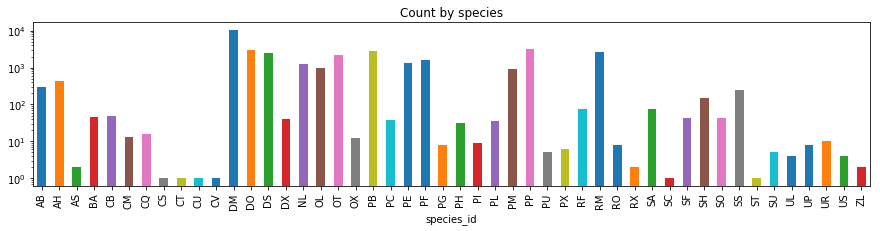

In [41]:
# create a quick bar chart by setting `kind` to 'bar'
species_counts.plot(kind='bar',
                    figsize=(15,3),           #Sets the size of the plot
                    title='Count by species', #Sets the title
                    logy=True);               #Log transforms the y-axis


---
### <font color='red'>Challenge - Plots</font>
1. Create a plot of **average weight** across all **species** per plot.<br>*Hint: you first need to summarize the data on plot_id, computing mean of the weigth column, then follow the syntax above.* 
1. Create a plot of the number of record_ids of males versus females for the entire dataset.<br>*Hint: you need to group on sex and then compute the count of record_ids in the resulting grouped object. 

In [42]:
#Challenge 1: Plot average weight per plot
data = surveys_df.groupby('???????').mean()['??????']
data.plot(kind='bar',title="Mean weight by plot"));

SyntaxError: invalid syntax (<ipython-input-42-843cdc885820>, line 3)

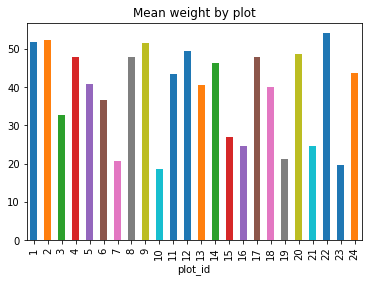

In [43]:
#Challenge 1: Plot average weight per plot
data = surveys_df.groupby('plot_id').mean()['weight']
data.plot(kind='bar',title="Mean weight by plot");

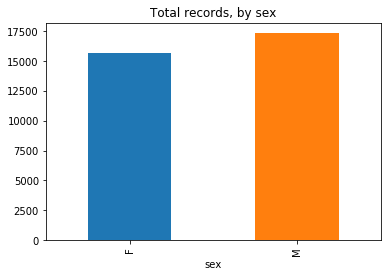

In [44]:
#Challenge 2:
data = surveys_df.groupby('sex').count()['record_id']
data.plot(kind='bar',title='Total records, by sex');

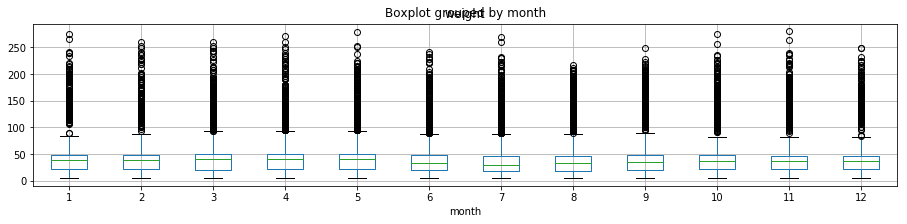

In [45]:
#Pandas has lots of plotting options...
surveys_df.boxplot(column=['weight'],by='month',figsize=(15,3));

---
### Advanced Plotting...</font>
Create a stacked bar plot, with weight on the Y axis, and the stacked variable being `sex`. The plot should show total weight by sex for each plot. Some tips are below to help you solve this challenge:

* For more on Pandas plots, visit this link: http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot
* You can use the code that follows to create a stacked bar plot but the data to stack need to be in individual columns. Here’s a simple example with some data where ‘a’, ‘b’, and ‘c’ are the groups, and ‘one’ and ‘two’ are the subgroups.

In [46]:
d = {'one' : pd.Series([1., 2., 3.], 
                       index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], 
                       index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


We can plot the above with:

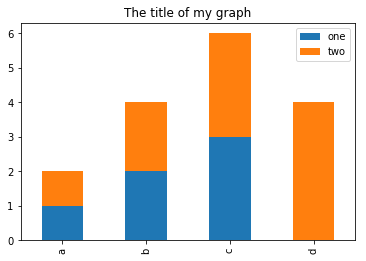

In [47]:
# plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=True,title="The title of my graph");

*  You can use the .unstack() method to transform grouped data into columns for each plotting. Try running .unstack() on some DataFrames above and see what it yields.

Start by transforming the grouped data (by plot and sex) into an unstacked layout, then create a stacked plot.

In [48]:
#Group data by plot and by sex, and then calculate a sum of weights for each plot.
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
plot_sex_count

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F      15481.0
   

Below we’ll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.

In [49]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
dfPlotSex = plot_sex_count.unstack()
dfPlotSex.head()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0


Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:

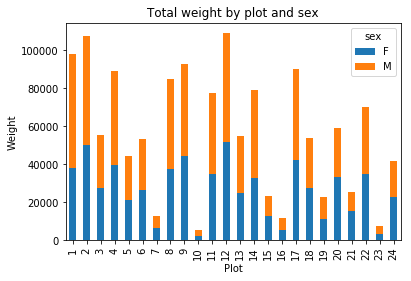

In [50]:
s_plot = dfPlotSex.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot");